## Prática 5: Investigando o aquecimento recente dos oceanos usando dados Argo

Lara Schlumbom, novembro de 2023

Adicionar títulos e labels, prestar atenção nos colormaps, ticks e tamanho das imagens finais.

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import gsw
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean as cmo

### Passo 1: Carregando os dados no xarray

#### 1.1 Acessando o diretório

In [3]:
ls /data/argo/RG_CLIMATOLOGY

RG_ArgoClim_Salinity_2019.nc*  RG_ArgoClim_Temperature_2019.nc*


#### 1.2 Abrindo os datasets

In [4]:
salt = xr.open_dataset('/data/argo/RG_CLIMATOLOGY/RG_ArgoClim_Salinity_2019.nc', decode_times=False)
temp = xr.open_dataset('/data/argo/RG_CLIMATOLOGY/RG_ArgoClim_Temperature_2019.nc', decode_times=False)

In [5]:
salt

<xarray.Dataset>
Dimensions:                (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                            TIME: 180)
Coordinates:
  * LONGITUDE              (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE               (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE               (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                   (TIME) float32 0.5 1.5 2.5 3.5 ... 177.5 178.5 179.5
Data variables:
    ARGO_SALINITY_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    ARGO_SALINITY_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 ...
    BATHYMETRY_MASK        (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    MAPPING_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 ...

In [6]:
temp

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 180)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) float32 0.5 1.5 2.5 ... 177.5 178.5 179.5
Data variables:
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 ...
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    MAPPING_MASK              (PRESSURE, LATITUDE, LONGITUDE) float32 ...

#### 1.3 Mesclando os datasets

In [7]:
RG = xr.merge([salt, temp])

In [8]:
RG

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 180)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) float32 0.5 1.5 2.5 ... 177.5 178.5 179.5
Data variables:
    ARGO_SALINITY_MEAN        (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 ...
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 1.0 ......
    MAPPING_MASK              (PRESSURE, LATITUDE, LONGITUDE) float32 2e+03 ....
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 ...

In [9]:
del salt
del temp

### Passo 2: Atualizando o dataset

#### 2.1 Criando um array de datas

In [10]:
# criar um array datetime para substituir o tempo do dataset
time = np.arange('2004-01','2019-01', dtype='datetime64[M]')

#### 2.2 Atualizando a coordenada temporal

In [11]:
RG = RG.assign_coords({'TIME': time})
RG

/tmp/ipykernel_445447/831474112.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  RG = RG.assign_coords({'TIME': time})
/tmp/ipykernel_445447/831474112.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond p

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 180)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) datetime64[ns] 2004-01-01 ... 2018-12-01
Data variables:
    ARGO_SALINITY_MEAN        (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 ...
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 1.0 ......
    MAPPING_MASK              (PRESSURE, LATITUDE, LONGITUDE) float32 2e+03 ....
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 ...

#### * Atualizando a longitude para (-180,180)

In [12]:
RG.coords['LONGITUDE'] = (RG.LONGITUDE + 180) % 360 - 180
RG = RG.sortby(RG.LONGITUDE)

### Passo 3: Visualizando os dados

#### 3.1 Cálculo da temperatura e salinidade totais

In [13]:
# calcular temperatura total
t_temp = RG.ARGO_TEMPERATURE_MEAN + RG.ARGO_TEMPERATURE_ANOMALY
t_salt = RG.ARGO_SALINITY_MEAN + RG.ARGO_SALINITY_ANOMALY

# adicionar temperatura total ao dataset
RG = RG.assign({'TOTAL_TEMP': t_temp, 'TOTAL_SALT': t_salt})
RG

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 180)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 -179.5 -178.5 ... 178.5 179.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) datetime64[ns] 2004-01-01 ... 2018-12-01
Data variables:
    ARGO_SALINITY_MEAN        (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 ...
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 1.0 ......
    MAPPING_MASK              (PRESSURE, LATITUDE, LONGITUDE) float32 2e+03 ....
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 ...
    TOTAL_TEMP                (PRESSURE, LATITUDE, LONGITUDE, TIME) float32 1...
    TOTAL_SALT                (PRESSURE, LATITUDE, LONGITUDE, TIME) float32 3...

#### 3.2 Mapas de temperatura total

Para 2,5 dbar

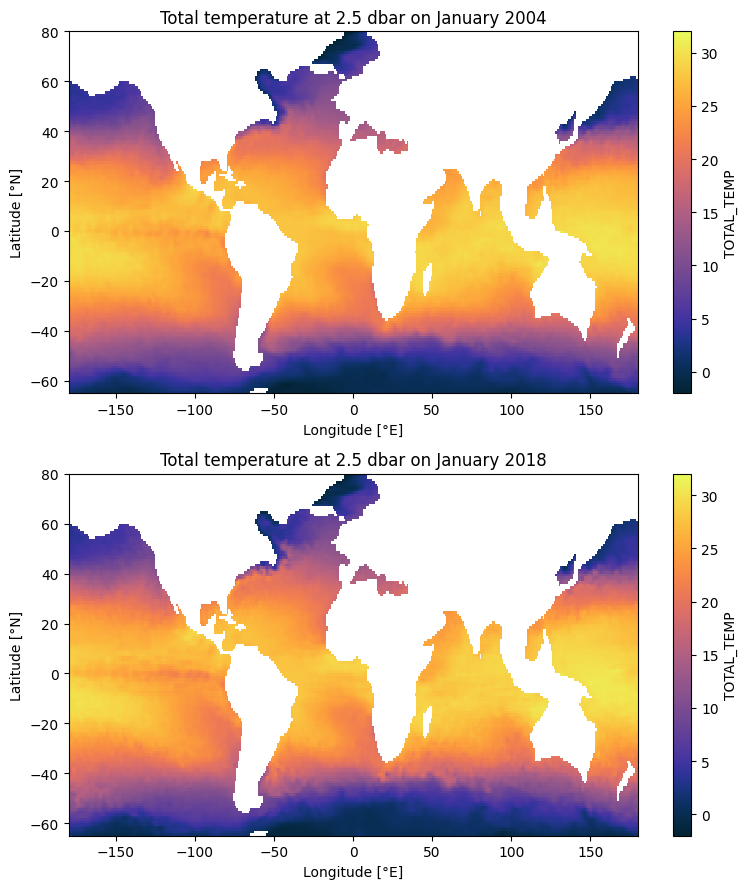

In [102]:
fig = plt.figure(figsize=(8,9))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.subplots_adjust(hspace=.3)

# selecionando o tempo e pressão de interesse
p1_2004 = RG.isel(TIME=0).sel(PRESSURE=2.5)
p1_2018 = RG.isel(TIME=-12).sel(PRESSURE=2.5)

# definindo os key word arguments
kwargs = dict(cmap = cmo.cm.thermal, vmin=-2, vmax=32)

# plotando os dados nos respectivos subplots
p1_2004.TOTAL_TEMP.plot(ax=ax1, **kwargs)
p1_2018.TOTAL_TEMP.plot(ax=ax2, **kwargs)

ax1.set_title('Total temperature at 2.5 dbar on January 2004')
ax1.set_xlabel('Longitude [°E]')
ax1.set_ylabel('Latitude [°N]')

ax2.set_title('Total temperature at 2.5 dbar on January 2018')
ax2.set_xlabel('Longitude [°E]')
ax2.set_ylabel('Latitude [°N]')

plt.tight_layout()
# plt.savefig('p5_temp_p2,5')

Para 1975 dbar

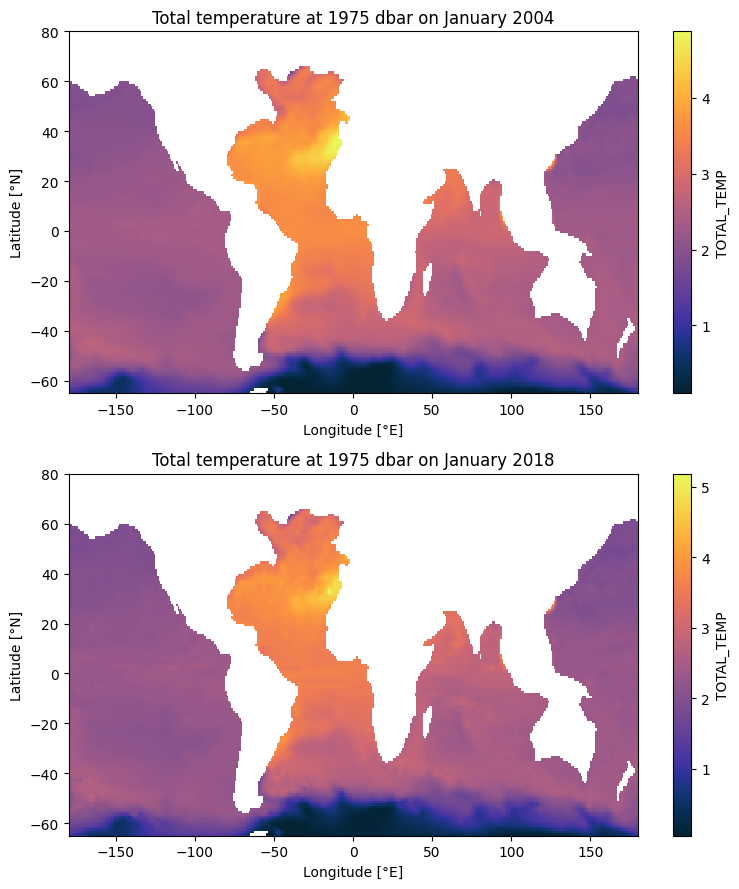

In [91]:
fig = plt.figure(figsize=(8,9))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.subplots_adjust(hspace=.3)

# selecionando o tempo e pressão de interesse
p2_2004 = RG.isel(TIME=0).sel(PRESSURE=1975)
p2_2018 = RG.isel(TIME=-12).sel(PRESSURE=1975)

# plotando os dados nos respectivos subplots
p2_2004.TOTAL_TEMP.plot(ax=ax1, cmap = cmo.cm.thermal)
p2_2018.TOTAL_TEMP.plot(ax=ax2, cmap = cmo.cm.thermal)

ax1.set_title('Total temperature at 1975 dbar on January 2004')
ax1.set_xlabel('Longitude [°E]')
ax1.set_ylabel('Latitude [°N]')

ax2.set_title('Total temperature at 1975 dbar on January 2018')
ax2.set_xlabel('Longitude [°E]')
ax2.set_ylabel('Latitude [°N]')

plt.tight_layout()
# plt.savefig('p5_temp_p1975')

#### 3.3 Mapas de salinidade total

Para 2,5 dbar

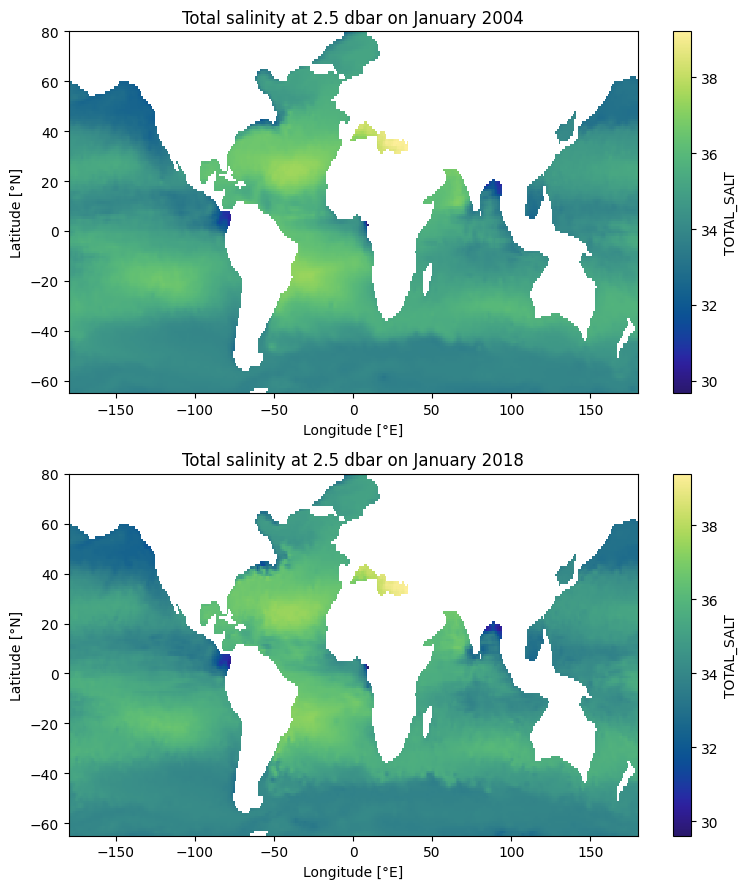

In [93]:
fig = plt.figure(figsize=(8,9))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.subplots_adjust(hspace=.3)

# plotando os dados nos respectivos subplots
p1_2004.TOTAL_SALT.plot(ax=ax1, cmap = cmo.cm.haline)
p1_2018.TOTAL_SALT.plot(ax=ax2, cmap = cmo.cm.haline)

ax1.set_title('Total salinity at 2.5 dbar on January 2004')
ax1.set_xlabel('Longitude [°E]')
ax1.set_ylabel('Latitude [°N]')

ax2.set_title('Total salinity at 2.5 dbar on January 2018')
ax2.set_xlabel('Longitude [°E]')
ax2.set_ylabel('Latitude [°N]')

plt.tight_layout()
# plt.savefig('p5_salt_p2,5')

Para 1975 dbar

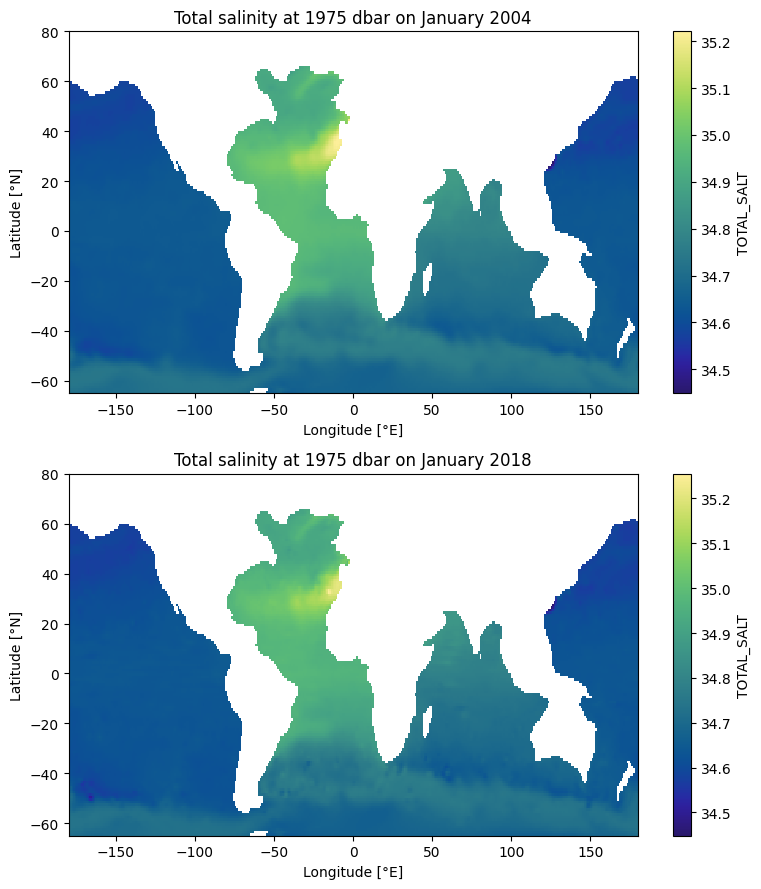

In [97]:
fig = plt.figure(figsize=(8,9))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.subplots_adjust(hspace=.3)

# plotando os dados nos respectivos subplots
p2_2004.TOTAL_SALT.plot(ax=ax1, cmap = cmo.cm.haline)
p2_2018.TOTAL_SALT.plot(ax=ax2, cmap = cmo.cm.haline)

ax1.set_title('Total salinity at 1975 dbar on January 2004')
ax1.set_xlabel('Longitude [°E]')
ax1.set_ylabel('Latitude [°N]')

ax2.set_title('Total salinity at 1975 dbar on January 2018')
ax2.set_xlabel('Longitude [°E]')
ax2.set_ylabel('Latitude [°N]')

plt.tight_layout()
# plt.savefig('p5_salt_p1975')

#### 3.4 Médias globais de temperatura e salinidade

In [17]:
MEAN = RG.resample(TIME = 'Y').mean()

In [18]:
GMEAN = MEAN.mean(dim = ['LONGITUDE','LATITUDE'])
GMEAN

<xarray.Dataset>
Dimensions:                   (PRESSURE: 58, TIME: 15)
Coordinates:
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) datetime64[ns] 2004-12-31 ... 2018-12-31
Data variables:
    ARGO_SALINITY_MEAN        (TIME, PRESSURE) float32 34.81 34.82 ... 34.72
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE) float32 -0.002023 ... 0.000706
    BATHYMETRY_MASK           (TIME, PRESSURE) float32 0.9941 0.9932 ... 0.9128
    MAPPING_MASK              (TIME, PRESSURE) float32 1.964e+03 ... 1.964e+03
    ARGO_TEMPERATURE_MEAN     (TIME, PRESSURE) float32 17.68 17.64 ... 2.344
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE) float32 -0.02486 ... 0.007171
    TOTAL_TEMP                (TIME, PRESSURE) float32 17.65 17.62 ... 2.351
    TOTAL_SALT                (TIME, PRESSURE) float32 34.81 34.81 ... 34.72

#### 3.5 Séries temporais de temperatura e salinidade para níveis de pressão

Média entre 0 e 500 dbar, 0 e 1000 dbar e 0 e 2000 dbar.

In [19]:
int1 = GMEAN.sel(PRESSURE=slice(0,500)).mean(dim = 'PRESSURE')
int2 = GMEAN.sel(PRESSURE=slice(0,1000)).mean(dim = 'PRESSURE')
int3 = GMEAN.sel(PRESSURE=slice(0,2000)).mean(dim = 'PRESSURE')

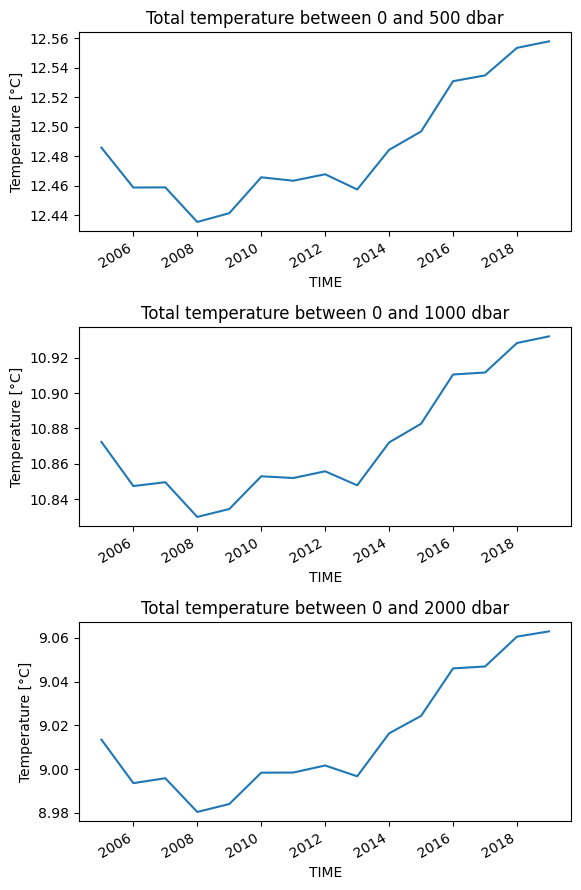

In [80]:
fig = plt.figure(figsize=(6,9))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
plt.subplots_adjust(hspace=.7)

int1.TOTAL_TEMP.plot(ax = ax1)
int2.TOTAL_TEMP.plot(ax = ax2)
int3.TOTAL_TEMP.plot(ax = ax3)

ax1.set_title('Total temperature between 0 and 500 dbar')
ax1.set_ylabel('Temperature [°C]')

ax2.set_title('Total temperature between 0 and 1000 dbar')
ax2.set_ylabel('Temperature [°C]')

ax3.set_title('Total temperature between 0 and 2000 dbar')
ax3.set_ylabel('Temperature [°C]')

fig.tight_layout()
# plt.savefig('p5_temp_pressure_intervals')

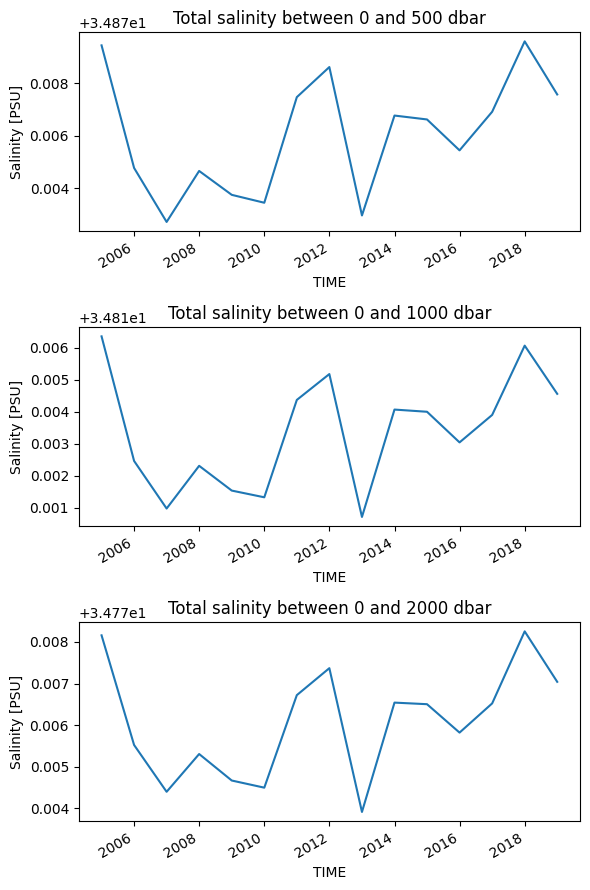

In [82]:
fig = plt.figure(figsize = (6,9))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
plt.subplots_adjust(hspace=.7)

int1.TOTAL_SALT.plot(ax = ax1)
int2.TOTAL_SALT.plot(ax = ax2)
int3.TOTAL_SALT.plot(ax = ax3)

ax1.set_title('Total salinity between 0 and 500 dbar')
ax1.set_ylabel('Salinity [PSU]')

ax2.set_title('Total salinity between 0 and 1000 dbar')
ax2.set_ylabel('Salinity [PSU]')

ax3.set_title('Total salinity between 0 and 2000 dbar')
ax3.set_ylabel('Salinity [PSU]')

fig.tight_layout()
# plt.savefig('p5_salt_pressure_intervals')

### Passo 4: Estimando o aquecimento oceânico

#### 4.1 Cálculo da temperatura potencial

In [22]:
ptemp = gsw.conversions.pt0_from_t(GMEAN.TOTAL_SALT, GMEAN.TOTAL_TEMP, GMEAN.PRESSURE)

In [23]:
GMEAN = GMEAN.assign({'P_TEMP': ptemp})
GMEAN

<xarray.Dataset>
Dimensions:                   (PRESSURE: 58, TIME: 15)
Coordinates:
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) datetime64[ns] 2004-12-31 ... 2018-12-31
Data variables:
    ARGO_SALINITY_MEAN        (TIME, PRESSURE) float32 34.81 34.82 ... 34.72
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE) float32 -0.002023 ... 0.000706
    BATHYMETRY_MASK           (TIME, PRESSURE) float32 0.9941 0.9932 ... 0.9128
    MAPPING_MASK              (TIME, PRESSURE) float32 1.964e+03 ... 1.964e+03
    ARGO_TEMPERATURE_MEAN     (TIME, PRESSURE) float32 17.68 17.64 ... 2.344
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE) float32 -0.02486 ... 0.007171
    TOTAL_TEMP                (TIME, PRESSURE) float32 17.65 17.62 ... 2.351
    TOTAL_SALT                (TIME, PRESSURE) float32 34.81 34.81 ... 34.72
    P_TEMP                    (TIME, PRESSURE) float64 17.65 17.62 ... 2.212

#### 4.2 Cálculo da densidade potencial

In [24]:
c_temp = gsw.CT_from_pt(GMEAN.TOTAL_SALT, GMEAN.P_TEMP)
rho = gsw.sigma0(GMEAN.TOTAL_SALT, c_temp) + 1000

In [25]:
GMEAN = GMEAN.assign({'RHO': rho})
GMEAN

<xarray.Dataset>
Dimensions:                   (PRESSURE: 58, TIME: 15)
Coordinates:
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) datetime64[ns] 2004-12-31 ... 2018-12-31
Data variables:
    ARGO_SALINITY_MEAN        (TIME, PRESSURE) float32 34.81 34.82 ... 34.72
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE) float32 -0.002023 ... 0.000706
    BATHYMETRY_MASK           (TIME, PRESSURE) float32 0.9941 0.9932 ... 0.9128
    MAPPING_MASK              (TIME, PRESSURE) float32 1.964e+03 ... 1.964e+03
    ARGO_TEMPERATURE_MEAN     (TIME, PRESSURE) float32 17.68 17.64 ... 2.344
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE) float32 -0.02486 ... 0.007171
    TOTAL_TEMP                (TIME, PRESSURE) float32 17.65 17.62 ... 2.351
    TOTAL_SALT                (TIME, PRESSURE) float32 34.81 34.81 ... 34.72
    P_TEMP                    (TIME, PRESSURE) float64 17.65 17.62 ... 2.212
    RHO                       (TIME, PRESSURE) float64 1.025e+03 ... 1.028e+03

#### 4.3 Cálculo da capacidade de calor

In [26]:
cp = gsw.cp_t_exact(GMEAN.TOTAL_SALT, GMEAN.TOTAL_TEMP, GMEAN.PRESSURE)

In [27]:
GMEAN = GMEAN.assign({'CP': cp})
GMEAN

<xarray.Dataset>
Dimensions:                   (PRESSURE: 58, TIME: 15)
Coordinates:
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) datetime64[ns] 2004-12-31 ... 2018-12-31
Data variables:
    ARGO_SALINITY_MEAN        (TIME, PRESSURE) float32 34.81 34.82 ... 34.72
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE) float32 -0.002023 ... 0.000706
    BATHYMETRY_MASK           (TIME, PRESSURE) float32 0.9941 0.9932 ... 0.9128
    MAPPING_MASK              (TIME, PRESSURE) float32 1.964e+03 ... 1.964e+03
    ARGO_TEMPERATURE_MEAN     (TIME, PRESSURE) float32 17.68 17.64 ... 2.344
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE) float32 -0.02486 ... 0.007171
    TOTAL_TEMP                (TIME, PRESSURE) float32 17.65 17.62 ... 2.351
    TOTAL_SALT                (TIME, PRESSURE) float32 34.81 34.81 ... 34.72
    P_TEMP                    (TIME, PRESSURE) float64 17.65 17.62 ... 2.212
    RHO                       (TIME, PRESSURE) float64 1.025e+03 ... 1.028e+03
    CP                        (TIME, PRESSURE) float64 3.996e+03 ... 3.931e+03

#### 4.4 Cálculo do conteúdo de calor

In [35]:
HC = GMEAN.RHO * GMEAN.P_TEMP * GMEAN.CP

In [36]:
GMEAN = GMEAN.assign({'HC': HC})
GMEAN

<xarray.Dataset>
Dimensions:                   (PRESSURE: 58, TIME: 15)
Coordinates:
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) datetime64[ns] 2004-12-31 ... 2018-12-31
Data variables:
    ARGO_SALINITY_MEAN        (TIME, PRESSURE) float32 34.81 34.82 ... 34.72
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE) float32 -0.002023 ... 0.000706
    BATHYMETRY_MASK           (TIME, PRESSURE) float32 0.9941 0.9932 ... 0.9128
    MAPPING_MASK              (TIME, PRESSURE) float32 1.964e+03 ... 1.964e+03
    ARGO_TEMPERATURE_MEAN     (TIME, PRESSURE) float32 17.68 17.64 ... 2.344
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE) float32 -0.02486 ... 0.007171
    TOTAL_TEMP                (TIME, PRESSURE) float32 17.65 17.62 ... 2.351
    TOTAL_SALT                (TIME, PRESSURE) float32 34.81 34.81 ... 34.72
    P_TEMP                    (TIME, PRESSURE) float64 17.65 17.62 ... 2.212
    RHO                       (TIME, PRESSURE) float64 1.025e+03 ... 1.028e+03
    CP                        (TIME, PRESSURE) float64 3.996e+03 ... 3.931e+03
    HC                        (TIME, PRESSURE) float64 7.232e+07 ... 8.933e+06

In [1]:
heat_content = GMEAN.HC.integrate('PRESSURE')
heat_content

NameError: name 'GMEAN' is not defined

#### 4.5 Plotando a série temporal

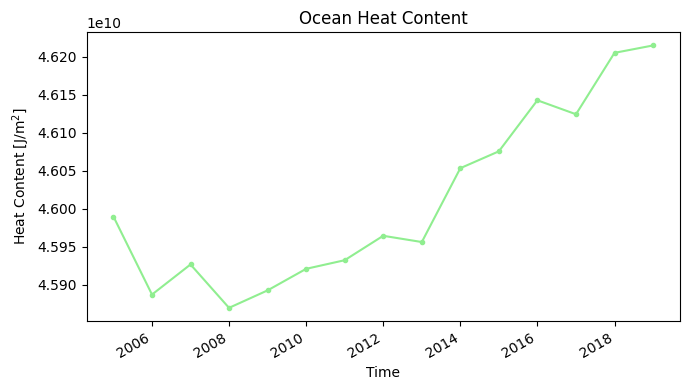

In [87]:
plt.figure(figsize = (7,4))

heat_content.plot(marker='.', c='lightgreen')

plt.title('Ocean Heat Content')
plt.ylabel(r'Heat Content [J/m$^2$]')
plt.xlabel('Time')

plt.tight_layout()
# plt.savefig('p5_heat_content')